In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Ticket', 'Parch'], axis= 1)

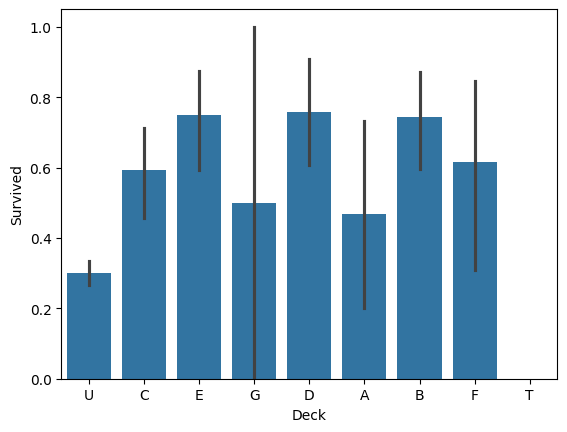

In [4]:
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Deck'] = df['Cabin'].str[0]
sns.barplot(x='Deck', y='Survived', data=df)
plt.show()

In [5]:
dummies = pd.get_dummies(df.Sex)
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [6]:
dummies = dummies.astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [7]:
df = pd.concat([df,dummies], axis= 1)
df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Deck,female,male
0,3,male,22.0,7.2500,Unknown,S,0,U,0,1
1,1,female,38.0,71.2833,C85,C,1,C,1,0
2,3,female,26.0,7.9250,Unknown,S,1,U,1,0
3,1,female,35.0,53.1000,C123,S,1,C,1,0
4,3,male,35.0,8.0500,Unknown,S,0,U,0,1


In [8]:
df= df.drop(['Sex', 'Cabin','Embarked' ], axis = 1)
df.head()

,Pclass,Age,Fare,Survived,Deck,female,male
0,3,22.0,7.2500,0,U,0,1
1,1,38.0,71.2833,1,C,1,0
2,3,26.0,7.9250,1,U,1,0
3,1,35.0,53.1000,1,C,1,0
4,3,35.0,8.0500,0,U,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Deck'] = le.fit_transform(df['Deck'])
df.head()

,Pclass,Age,Fare,Survived,Deck,female,male
0,3,22.0,7.2500,0,8,0,1
1,1,38.0,71.2833,1,2,1,0
2,3,26.0,7.9250,1,8,1,0
3,1,35.0,53.1000,1,2,1,0
4,3,35.0,8.0500,0,8,0,1


In [10]:
y= df.Survived
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
x= df.drop(['Survived'], axis=1)
x.head()

,Pclass,Age,Fare,Deck,female,male
0,3,22.0,7.2500,8,0,1
1,1,38.0,71.2833,2,1,0
2,3,26.0,7.9250,8,1,0
3,1,35.0,53.1000,2,1,0
4,3,35.0,8.0500,8,0,1


In [12]:
x.columns[x.isna().any()]

Index(['Age'], dtype='object')

In [13]:
x.Age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [14]:
x.Age = x.Age.fillna(x.Age.mean())
x.Age

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
model.score(x_test, y_test)

0.7932960893854749

In [19]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
model.score(x_test, y_test)

0.08874588874588862

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune n_estimators

# Train the model
rf_model.fit(x_train, y_train)

# Check the score on the test set
rf_model.score(x_test, y_test)

0.7932960893854749